In [1]:
from model import TIPINN_Cooling
import matplotlib.pyplot as plt

In [2]:
phys_losses = [True, False]
topo_losses = [True, False]
records = []
for pl in phys_losses:
    for tl in topo_losses:
        print(f"{pl=}, {tl=}")
        cooling = TIPINN_Cooling(phys_loss=pl, topo_loss=tl, lr = 1e-5, epochs=10_000)
        losses = cooling.fit(cooling.t, cooling.T)
        predict = cooling.predict(cooling.times)
        data = {'phys_loss': pl, 'topo_loss': tl, 'losses': losses, 'prediction': predict, 'times': cooling.times}
        records.append(data)

pl=True, tl=True


/home/codespace/.python/current/lib/python3.10/site-packages/ot/lp/__init__.py:107: RuntimeWarning: invalid value encountered in scalar divide
  c = (b.dot(beta0) - a.dot(alpha0)) / (a.sum() + b.sum())
/home/codespace/.python/current/lib/python3.10/site-packages/ot/lp/__init__.py:547: UserWarning: Problem infeasible. Check that a and b are in the simplex
  check_result(result_code)


Epoch 0/10000, loss: 4709.00


KeyboardInterrupt: 

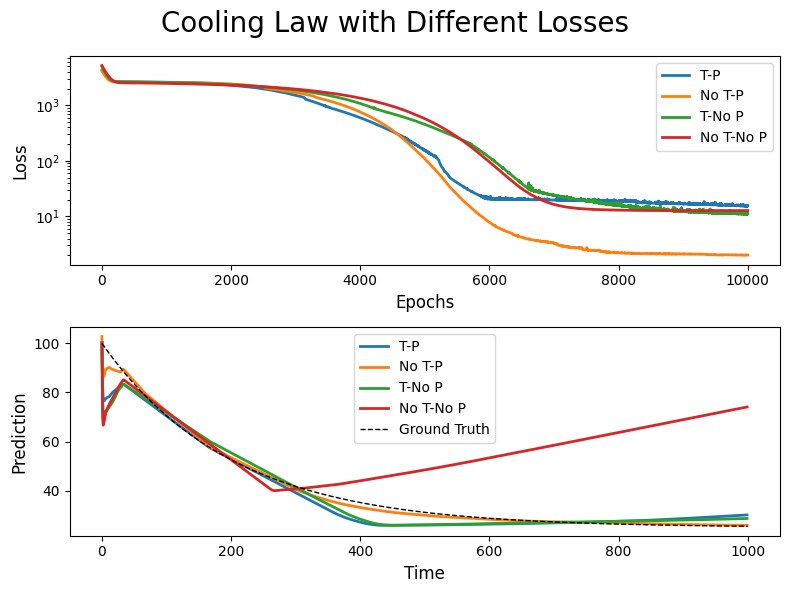

In [19]:
fig, ax = plt.subplots(2, 1, figsize = (8, 6))
for record in records:
    xs = range(len(record['losses']))
    ys = range(len(record['prediction']))
    tl = "T"
    pl = "P"
    if not record['topo_loss']:
        tl = "No T"
    if not record['phys_loss']:
        pl = "No P"
    label = tl + '-' + pl
    ax[0].plot(xs, record['losses'], label = label, lw = 2)
    ax[1].plot(ys, record['prediction'].numpy().flatten(), label = label, lw = 2)

ax[0].set_ylabel("Loss", fontsize = 12)
ax[0].set_xlabel("Epochs", fontsize = 12)
ax[0].set_yscale('log')
ax[0].legend()

ax[1].set_ylabel('Prediction', fontsize = 12)
ax[1].set_xlabel("Time", fontsize = 12)
ax[1].plot(record['times'], cooling.temps, label = 'Ground Truth', lw = 1, color = 'black', linestyle = '--')
ax[1].legend()
plt.suptitle("Cooling Law with Different Losses", fontsize = 20)
plt.tight_layout()
plt.show()